In [3]:
import pandas as pd
import numpy as np
import re# Numpy Library for Numerical Calculations
import numpy as np

# Pandas Library for Dataframe
import pandas as pd

# Matplotlib and for Plottings
import matplotlib.pyplot as plt

# Pickle Library for Saving the Model
import pickle

# RE Library for Regular Expression
import re

# NLTK Library for Natural Language Processing
import nltk
nltk.download('stopwords') # Downloading the Stopwords

# Stopwords for removing stopwords in the Text
from nltk.corpus import stopwords

# PorterStemmer for Stemming the Words
from nltk.stem.porter import PorterStemmer

# CountVectorizer for Bagging of Words and Vectorizing it
from sklearn.feature_extraction.text import CountVectorizer

# Train_Test_Split for splitting the Dataset
from sklearn.model_selection import train_test_split

# Decision Tree Classifier, Random Forest Classifier and Multinomial Naïve Bayes are Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Accuracy Score and Confusion Matrix is for Analysis of Models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanoj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data = pd.read_csv("spamcall.csv", encoding='ISO-8859-1')

In [7]:
spam = pd.DataFrame(data)
spam.rename(columns={spam.columns[0]: 'label', spam.columns[1]: 'message'}, inplace=True)


In [9]:
print(spam)

       label                                            message
0      fraud  hello, i m bank manager of SBI, ur debit card ...
1      fraud  Todays Vodafone numbers ending with 4882 are s...
2     normal               Please don't say like that. Hi hi hi
3     normal                                         Thank you!
4     normal  Oh that was a forwarded message. I thought you...
...      ...                                                ...
5920   fraud  to get 1000 INR voucher please call on 8898655...
5921   fraud  to get free access of google cloud account hit...
5922   fraud  to get free AWS cloud account hit on given mes...
5923   fraud  to get free access of Microsoft Azure hit on g...
5924   fraud  hello sir, we are from your bank have you fill...

[5925 rows x 2 columns]


In [11]:

spam.head()

,label,message
0,fraud,"hello, i m bank manager of SBI, ur debit card ..."
1,fraud,Todays Vodafone numbers ending with 4882 are s...
2,normal,Please don't say like that. Hi hi hi
3,normal,Thank you!
4,normal,Oh that was a forwarded message. I thought you...


In [13]:
spam.isnull().sum()

label      0
message    0
dtype: int64

In [15]:
spam.shape

(5925, 2)

In [17]:
spam.groupby('label').size()

label
fraud      638
normal    5287
dtype: int64

<Axes: xlabel='label'>

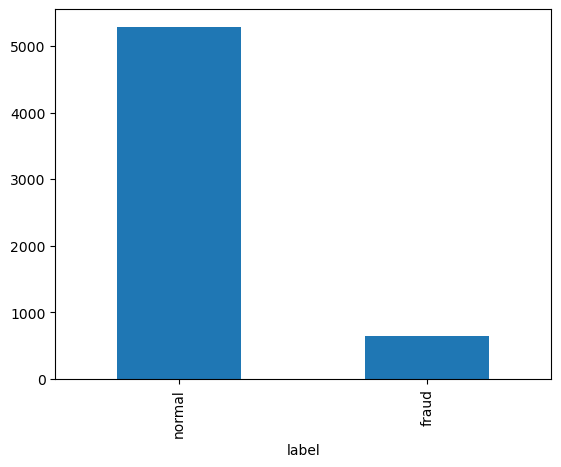

In [19]:
spam['label'].value_counts().plot(kind='bar')

In [21]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(spam)):
    review = re.sub('[^a-zA-Z]', ' ', spam['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Printing the first 5 values in the corpus list
corpus[1:6]

['today vodafon number end select receiv award number match call receiv award',
 'pleas say like hi hi hi',
 'thank',
 'oh forward messag thought send',
 'got seventeen pound seven hundr ml hope ok']

In [22]:
cv = CountVectorizer(max_features = 4000)
X = cv.fit_transform(corpus).toarray()
Y = pd.get_dummies(spam['label'])
Y = Y.iloc[:, 1].values

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)

In [24]:
# Model 3 - Multinomial Naïve Bayes
model3 = MultinomialNB()
model3.fit(X_train, Y_train)

MultinomialNB()

In [29]:
pred1 = model3.predict(X_test)

In [31]:
print("Multinomial Naïve Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred1))
print("Accuracy: ", accuracy_score(Y_test, pred1))

Multinomial Naïve Bayes
Confusion Matrix: 
[[ 118   14]
 [  21 1032]]
Accuracy:  0.9704641350210971


<Axes: >

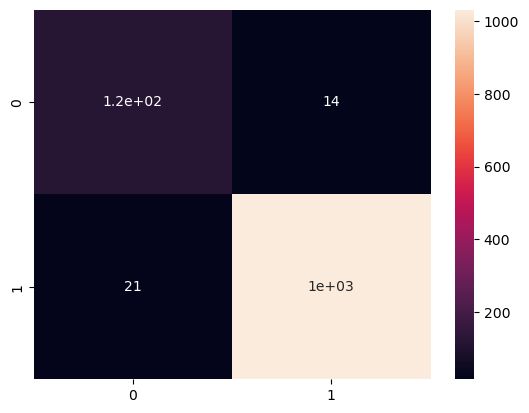

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred1)

import seaborn as sns
sns.heatmap(cm, annot=True)


In [35]:
report1 = classification_report(Y_test, pred1)
print("Classification Report for MNB \n", report1)

Classification Report for MNB 
               precision    recall  f1-score   support

       False       0.85      0.89      0.87       132
        True       0.99      0.98      0.98      1053

    accuracy                           0.97      1185
   macro avg       0.92      0.94      0.93      1185
weighted avg       0.97      0.97      0.97      1185



In [37]:


# Initialize the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
gb_model.fit(X_train, Y_train)

GradientBoostingClassifier()

In [39]:
pred2 = gb_model.predict(X_test)

In [41]:
print("Gradient Boosting")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred2))
print("Accuracy: ", accuracy_score(Y_test, pred2))

Gradient Boosting
Confusion Matrix: 
[[ 101   31]
 [   2 1051]]
Accuracy:  0.9721518987341772


<Axes: >

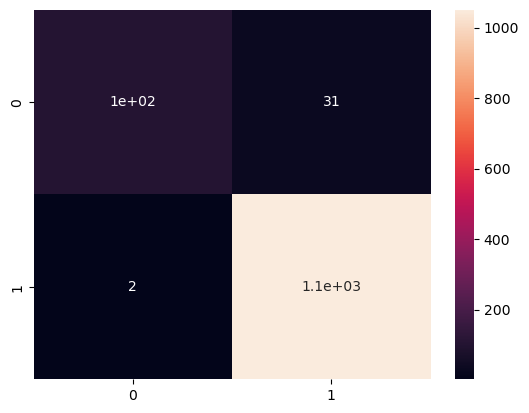

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred2)

import seaborn as sns
sns.heatmap(cm, annot=True)

In [45]:
report2 = classification_report(Y_test, pred2)
print("Classification Report for GB \n", report2)

Classification Report for GB 
               precision    recall  f1-score   support

       False       0.98      0.77      0.86       132
        True       0.97      1.00      0.98      1053

    accuracy                           0.97      1185
   macro avg       0.98      0.88      0.92      1185
weighted avg       0.97      0.97      0.97      1185



In [48]:
from sklearn.svm import SVC

# Initialize the SVM model with a linear kernel, which is good for text data
svm_model = SVC(kernel='linear')

# Train the model using your training data
svm_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [50]:
pred3 = svm_model.predict(X_test)

In [139]:
print("Support Vector Machine")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred3))
print("Accuracy: ", accuracy_score(Y_test, pred3))

Support Vector Machine
Confusion Matrix: 
[[ 113   19]
 [   7 1046]]
Accuracy:  0.9780590717299578


<Axes: >

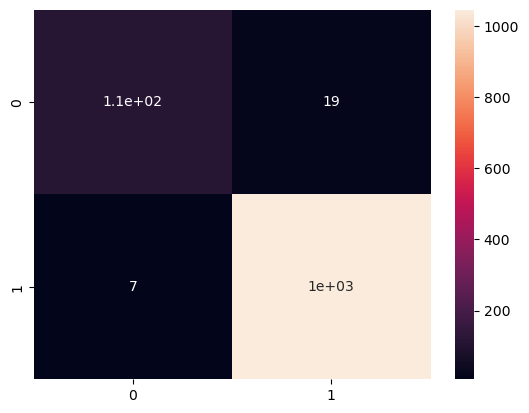

In [141]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred3)

import seaborn as sns
sns.heatmap(cm, annot=True)

In [143]:
report3 = classification_report(Y_test, pred3)
print("Classification Report for SVM \n", report3)

Classification Report for SVM 
               precision    recall  f1-score   support

       False       0.94      0.86      0.90       132
        True       0.98      0.99      0.99      1053

    accuracy                           0.98      1185
   macro avg       0.96      0.92      0.94      1185
weighted avg       0.98      0.98      0.98      1185



In [145]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence

# Train the model
log_reg_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [147]:
pred4 = svm_model.predict(X_test)

In [149]:
print("LogisticRegression")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred4))
print("Accuracy: ", accuracy_score(Y_test, pred4))

Support Vector Machine
Confusion Matrix: 
[[ 113   19]
 [   7 1046]]
Accuracy:  0.9780590717299578


<Axes: >

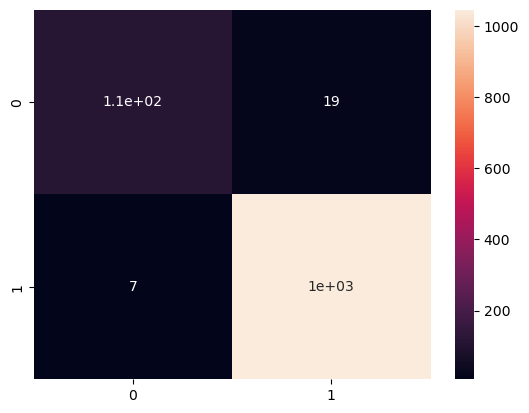

In [151]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred4)

import seaborn as sns
sns.heatmap(cm, annot=True)

In [153]:
report4 = classification_report(Y_test, pred4)
print("Classification Report for LR \n", report4)

Classification Report for LR 
               precision    recall  f1-score   support

       False       0.94      0.86      0.90       132
        True       0.98      0.99      0.99      1053

    accuracy                           0.98      1185
   macro avg       0.96      0.92      0.94      1185
weighted avg       0.98      0.98      0.98      1185



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define SVM as base learner
# probability=True is required because AdaBoost needs confidence scores
svm = SVC(probability=True, kernel="linear")

# Create AdaBoost model with SVM base estimator
model = AdaBoostClassifier(
    base_estimator=svm,
    n_estimators=50,
    learning_rate=0.5,
    algorithm="SAMME.R",  # SAMME.R uses probability estimates
    random_state=42
)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy with AdaBoost + SVM:", accuracy_score(y_test, y_pred))


In [ ]:
filename = "MNB.pkl"
pickle.dump(model3, open(filename, 'wb'))
print("Saved all Models")

In [115]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

In [117]:
with open("cv.pkl", "wb") as f:
    pickle.dump(cv, f)

In [1]:
import tensorflow as tf


In [5]:
# Build simple TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=4000, output_dim=16, input_length=100),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

C:\Users\kanoj\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)